In [42]:
%pylab inline

import requests
import datetime

plt.style.use(['ggplot', 'seaborn-talk'])

Populating the interactive namespace from numpy and matplotlib


/Users/simon/Documents/Development/network-checker/venv/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axis']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


First we fetch the data from the server

In [4]:
SERVER_URL = "http://pi3.local:5002/api/gaps"
r = requests.get(SERVER_URL)
r.raise_for_status()

In [5]:
data = r.json()
print(data.keys())

dict_keys(['results'])


In [79]:
results = data["results"]
gaps = np.array([-r[1] for r in results])
timestamps = (r[0] for r in results)
dts = np.array([datetime.datetime.fromtimestamp(t) for t in timestamps])

# Sort the arrays
idx = np.argsort(dts)
timestamps, gaps = [arr[idx] for arr in [dts, gaps]]

Look at the time series first

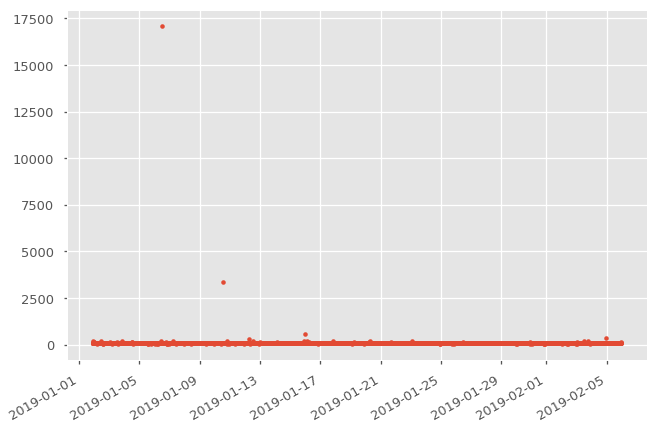

In [80]:
fig, axis = plt.subplots()
axis.plot_date(dts, gaps, ".")
fig.autofmt_xdate()

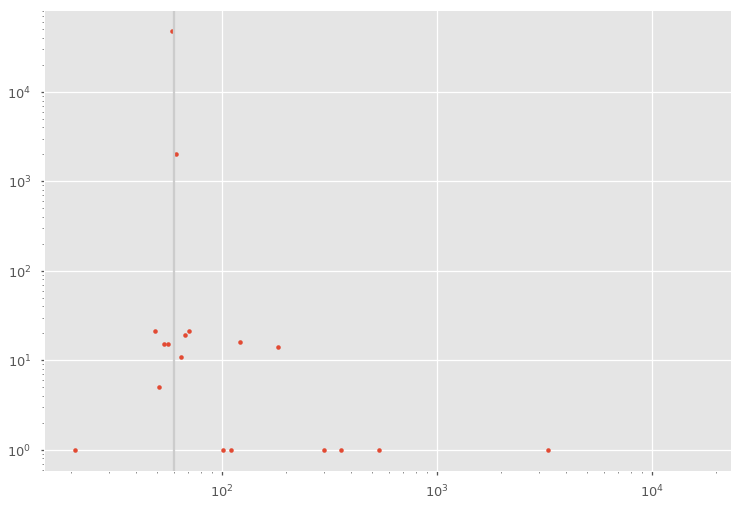

In [81]:
bins = np.logspace(np.log10(gaps.min()), np.log10(gaps.max()), 150)
heights, _ = np.histogram(gaps, bins=bins)
x = (bins[:-1] + bins[1:]) / 2.

fig, axis = plt.subplots()
axis.plot(x, heights, ".")
axis.set(xscale="log", yscale="log")
axis.axvline(60, color="0.8")
fig.tight_layout()

Try to find the event times

In [82]:
width = 5
target = 60
idx = (gaps < (target - width)) | (gaps > (target + width))
print(f"Found {idx.sum()} events (out of {idx.size}")

Found 123 events (out of 50020


In [83]:
for dt, gap in zip(dts[idx], gaps[idx]):
    print(dt, gap)

2019-02-05 22:29:12.468002 120.84395480155945
2019-02-04 23:19:12.502073 361.142560005188
2019-02-03 22:12:12.493431 69.97623682022095
2019-02-03 22:11:12.484799 50.086687088012695
2019-02-03 18:28:12.488145 179.97472405433655
2019-02-03 12:04:12.497383 179.998957157135
2019-02-03 00:50:12.447409 119.10225009918213
2019-02-03 00:32:12.486845 69.98829817771912
2019-02-03 00:31:12.478243 49.97971987724304
2019-02-02 22:36:12.479225 69.9736909866333
2019-02-02 22:35:12.456724 50.004387855529785
2019-02-02 10:52:12.484969 69.9960150718689
2019-02-02 10:51:12.469520 50.009469985961914
2019-02-02 09:23:12.496230 69.9678361415863
2019-02-02 09:22:12.456927 50.02896189689636
2019-02-02 00:38:12.480444 99.68227696418762
2019-02-02 00:37:12.487602 20.359328985214233
2019-01-31 21:29:12.478528 70.01218795776367
2019-01-31 21:28:12.482344 49.995354890823364
2019-01-31 20:41:12.457353 69.97434711456299
2019-01-31 20:40:12.494358 50.02221488952637
2019-01-31 20:32:12.484863 69.96435809135437
2019-01